In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("synthetic_it_asset_data.csv")

In [4]:
df.head()

,Asset ID,Asset Type,Purchase Date,Lifecycle Status,Maintenance Cost,Replacement Cost
0,A1,Printer,2022-01-26,Retired,4791.18,7617.17
1,A2,Laptop,2019-10-14,In Maintenance,2107.37,7292.71
2,A3,Printer,2024-02-13,Active,179.78,3695.11
3,A4,Router,2019-10-03,Disposed,4988.30,7164.77
4,A5,Router,2021-01-21,Retired,1876.14,9876.08


In [5]:
df.corr()

C:\Users\shrir\AppData\Local\Temp\ipykernel_19004\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Maintenance Cost,Replacement Cost
Maintenance Cost,1.00000,0.00558
Replacement Cost,0.00558,1.00000


In [6]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

current_date = pd.to_datetime('2024-07-12')
df['Age of Asset'] = (current_date - df['Purchase Date']).dt.days

df['Maintenance Cost Ratio'] = df['Maintenance Cost'] / df['Replacement Cost']

C:\Users\shrir\AppData\Local\Temp\ipykernel_19004\1097916355.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Asset Type', data=df, palette='viridis')


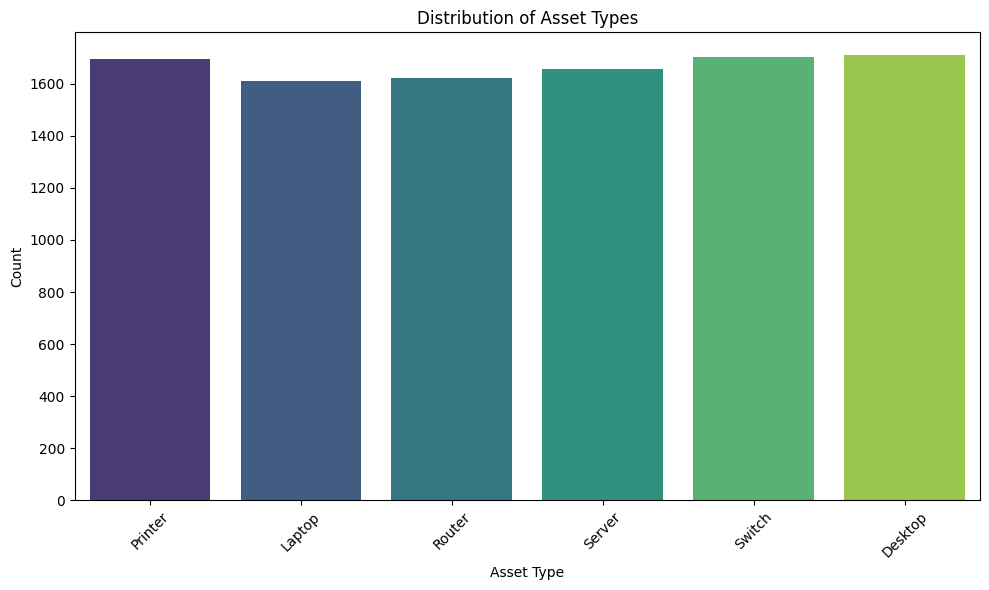

C:\Users\shrir\AppData\Local\Temp\ipykernel_19004\1097916355.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Lifecycle Status', data=df, palette='Set2')


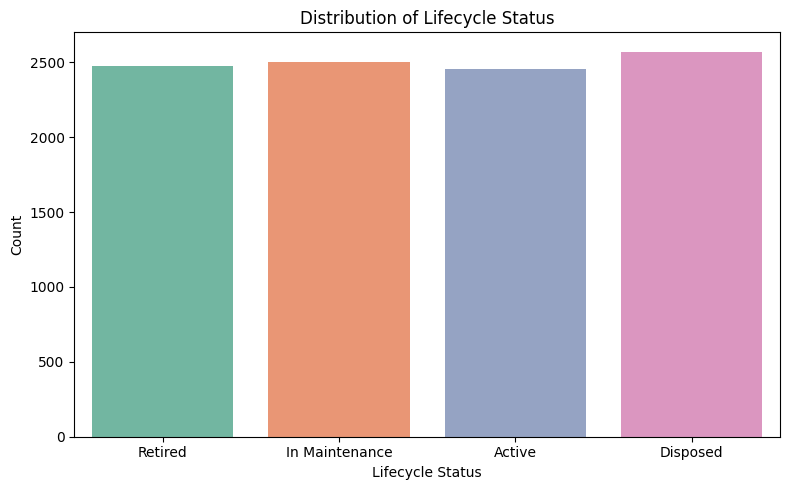

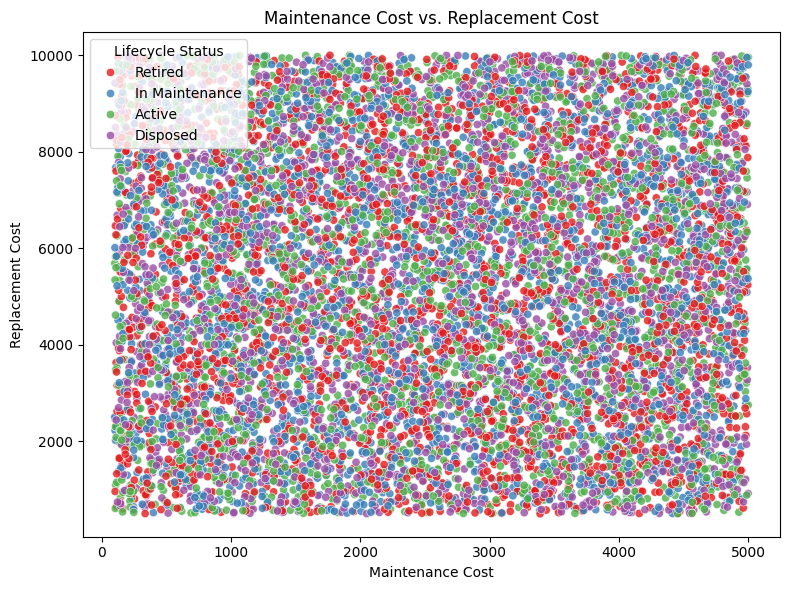

C:\Users\shrir\AppData\Local\Temp\ipykernel_19004\1097916355.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Asset Type', y='Maintenance Cost Ratio', data=df, palette='Pastel1')


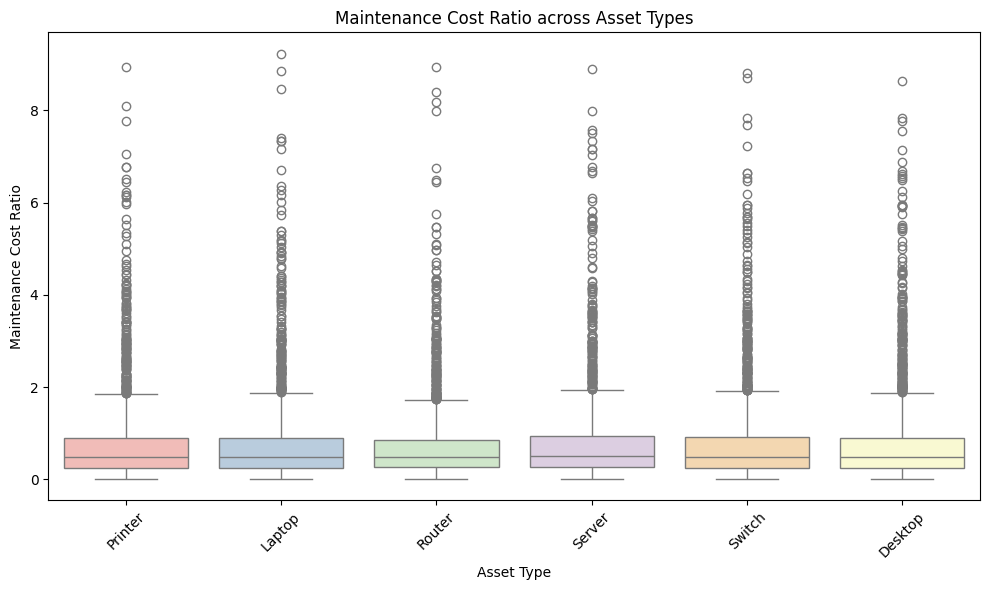

In [7]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Asset Type', data=df, palette='viridis')
plt.title('Distribution of Asset Types')
plt.xlabel('Asset Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.countplot(x='Lifecycle Status', data=df, palette='Set2')
plt.title('Distribution of Lifecycle Status')
plt.xlabel('Lifecycle Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Maintenance Cost', y='Replacement Cost', data=df, hue='Lifecycle Status', palette='Set1', alpha=0.8)
plt.title('Maintenance Cost vs. Replacement Cost')
plt.xlabel('Maintenance Cost')
plt.ylabel('Replacement Cost')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Asset Type', y='Maintenance Cost Ratio', data=df, palette='Pastel1')
plt.title('Maintenance Cost Ratio across Asset Types')
plt.xlabel('Asset Type')
plt.ylabel('Maintenance Cost Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
def replace_outliers_with_mean(df, col):
    mean_val = df[col].mean()
    std_val = df[col].std()
    lower_bound = mean_val - 2 * std_val
    upper_bound = mean_val + 2 * std_val
    df[col] = df[col].apply(lambda x: mean_val if x < lower_bound or x > upper_bound else x)
    return df

In [9]:
df = replace_outliers_with_mean(df, 'Maintenance Cost')
df = replace_outliers_with_mean(df, 'Replacement Cost')

In [10]:
df.head()

,Asset ID,Asset Type,Purchase Date,Lifecycle Status,Maintenance Cost,Replacement Cost,Age of Asset,Maintenance Cost Ratio
0,A1,Printer,2022-01-26,Retired,4791.18,7617.17,898,0.628997
1,A2,Laptop,2019-10-14,In Maintenance,2107.37,7292.71,1733,0.288969
2,A3,Printer,2024-02-13,Active,179.78,3695.11,150,0.048653
3,A4,Router,2019-10-03,Disposed,4988.30,7164.77,1744,0.696226
4,A5,Router,2021-01-21,Retired,1876.14,9876.08,1268,0.189968


In [11]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

current_date = pd.to_datetime('2024-07-12')
df['Age of Asset'] = (current_date - df['Purchase Date']).dt.days

df['Maintenance Cost Ratio'] = df['Maintenance Cost'] / df['Replacement Cost']

C:\Users\shrir\AppData\Local\Temp\ipykernel_16844\473715586.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Asset Type', y='Maintenance Cost Ratio', data=df, palette='Pastel1')


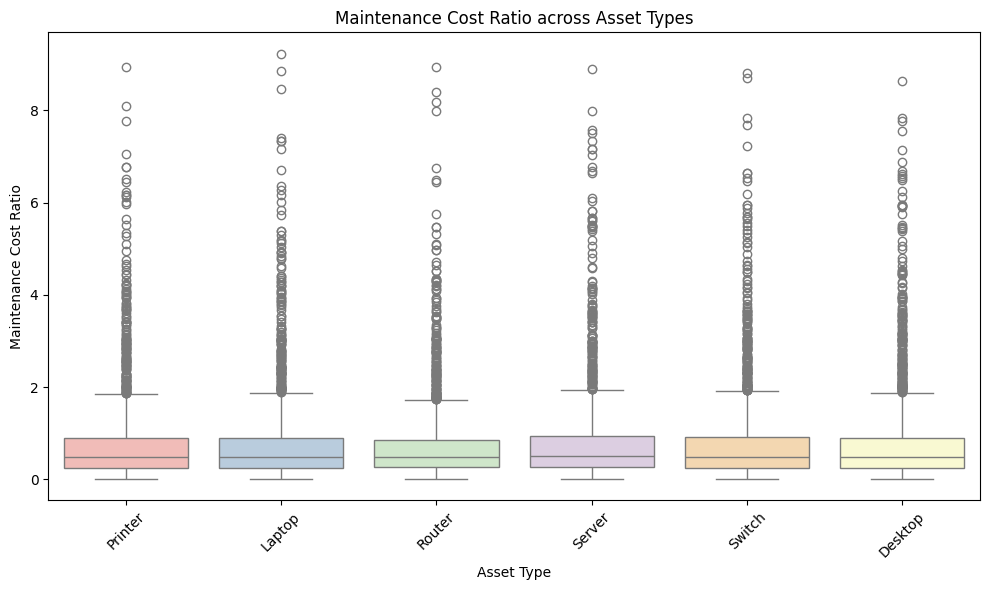

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Asset Type', y='Maintenance Cost Ratio', data=df, palette='Pastel1')
plt.title('Maintenance Cost Ratio across Asset Types')
plt.xlabel('Asset Type')
plt.ylabel('Maintenance Cost Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
df.head()

,Asset ID,Asset Type,Purchase Date,Lifecycle Status,Maintenance Cost,Replacement Cost,Age of Asset,Maintenance Cost Ratio
0,A1,Printer,2022-01-26,Retired,4791.18,7617.17,898,0.628997
1,A2,Laptop,2019-10-14,In Maintenance,2107.37,7292.71,1733,0.288969
2,A3,Printer,2024-02-13,Active,179.78,3695.11,150,0.048653
3,A4,Router,2019-10-03,Disposed,4988.30,7164.77,1744,0.696226
4,A5,Router,2021-01-21,Retired,1876.14,9876.08,1268,0.189968


In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [18]:
categorical_features = ['Asset Type', 'Lifecycle Status']
numerical_features = ['Replacement Cost', 'Age of Asset', 'Maintenance Cost Ratio']

# Preprocessing pipeline
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

In [29]:
X = df.drop(['Maintenance Cost', 'Asset ID', 'Purchase Date'], axis=1)
y = df['Maintenance Cost']

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd


numeric_features = ['Age of Asset', 'Maintenance Cost Ratio']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['Asset Type', 'Lifecycle Status']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {
            'regressor__fit_intercept': [True, False],
            'regressor__copy_X': [True, False],
            'regressor__n_jobs': [None, 1, 2, 4],
            'regressor__positive': [False]
        }
    },
    'Ridge Regression': {
        'model': Ridge(),
        'params': {
            'regressor__alpha': [0.1, 1.0, 10.0],
            'regressor__fit_intercept': [True, False],
            'regressor__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
            'regressor__max_iter': [None]
        }
    },
    'Lasso Regression': {
        'model': Lasso(),
        'params': {
            'regressor__alpha': [0.1, 1.0, 10.0],
            'regressor__fit_intercept': [True, False],
            'regressor__selection': ['cyclic', 'random']
        }
    },
    'Random Forest Regressor': {
        'model': RandomForestRegressor(),
        'params': {
            'regressor__n_estimators': [50, 100, 200],
            'regressor__max_depth': [None, 10, 20],
            'regressor__min_samples_split': [2, 5, 10]
        }
    }
}

best_model = None
best_r2_score = -float('inf')

for model_name, config in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', config['model'])])
    
    random_search = RandomizedSearchCV(pipeline, config['params'], n_iter=10, cv=5, scoring='r2', verbose=1)
    random_search.fit(X_train, y_train)
    
    # Get the best model and its R-squared score
    if random_search.best_score_ > best_r2_score:
        best_model = random_search.best_estimator_
        best_r2_score = random_search.best_score_
        best_model_name = model_name
    
    # Print results
    print(f'{model_name}:')
    print(f'  Best Parameters: {random_search.best_params_}')
    print(f'  Best R-squared: {random_search.best_score_:.2f}')
    print()

    
print(f'Best Model based on R-squared: {best_model_name}')
print(f'Best R-squared: {best_r2_score:.2f}')


y_pred = best_model.predict(X_test)


predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df.head())


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Linear Regression:
  Best Parameters: {'regressor__positive': False, 'regressor__n_jobs': 1, 'regressor__fit_intercept': False, 'regressor__copy_X': True}
  Best R-squared: 0.18

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Ridge Regression:
  Best Parameters: {'regressor__solver': 'svd', 'regressor__max_iter': None, 'regressor__fit_intercept': True, 'regressor__alpha': 10.0}
  Best R-squared: 0.18

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.382e+09, tolerance: 5.524e+06
  model = cd_fast.enet_coordinate_descent(
C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.230e+08, tolerance: 5.552e+06
  model = cd_fast.enet_coordinate_descent(
C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.696e+08, to

Lasso Regression:
  Best Parameters: {'regressor__selection': 'cyclic', 'regressor__fit_intercept': True, 'regressor__alpha': 1.0}
  Best R-squared: 0.18

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest Regressor:
  Best Parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 10, 'regressor__max_depth': 10}
  Best R-squared: 0.57

Best Model based on R-squared: Random Forest Regressor
Best R-squared: 0.57
       Actual    Predicted
6252  3315.96  3476.806912
4684   106.93   139.485938
1731  1819.91  2636.984360
4742  1781.27  3364.850585
4521  1837.78  1344.564078


In [35]:
import joblib
import pandas as pd


best_model_filename = f'best_{best_model_name}_model.pkl'
joblib.dump(best_model, best_model_filename)


loaded_model = joblib.load(best_model_filename)


new_data = pd.DataFrame({
    'Age of Asset': [1000], 
    'Maintenance Cost Ratio': [0.5],
    'Asset Type': ['Printer'],
    'Lifecycle Status': ['Active']
})


new_predictions = loaded_model.predict(new_data)


print("New Predictions:")
print(new_predictions)

New Predictions:
[3591.30210211]


#### Resource optimaztion 

In [13]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Avg Maintenance Cost'] = df.groupby('Asset Type')['Maintenance Cost'].transform('mean')
df['Maintenance Cost Trend'] = df.groupby('Asset Type')['Maintenance Cost'].transform(lambda x: x.diff().mean())
df['Maintenance Cost Trend'].fillna(0, inplace=True)

print(df.head())

  Asset ID Asset Type Purchase Date Lifecycle Status  Maintenance Cost  \
0       A1    Printer    2022-01-26          Retired           4791.18   
1       A2     Laptop    2019-10-14   In Maintenance           2107.37   
2       A3    Printer    2024-02-13           Active            179.78   
3       A4     Router    2019-10-03         Disposed           4988.30   
4       A5     Router    2021-01-21          Retired           1876.14   

   Replacement Cost  Age of Asset  Maintenance Cost Ratio  \
0           7617.17           898                0.628997   
1           7292.71          1733                0.288969   
2           3695.11           150                0.048653   
3           7164.77          1744                0.696226   
4           9876.08          1268                0.189968   

   Avg Maintenance Cost  Maintenance Cost Trend  
0           2621.877786               -2.767218  
1           2524.106139               -0.631447  
2           2621.877786               

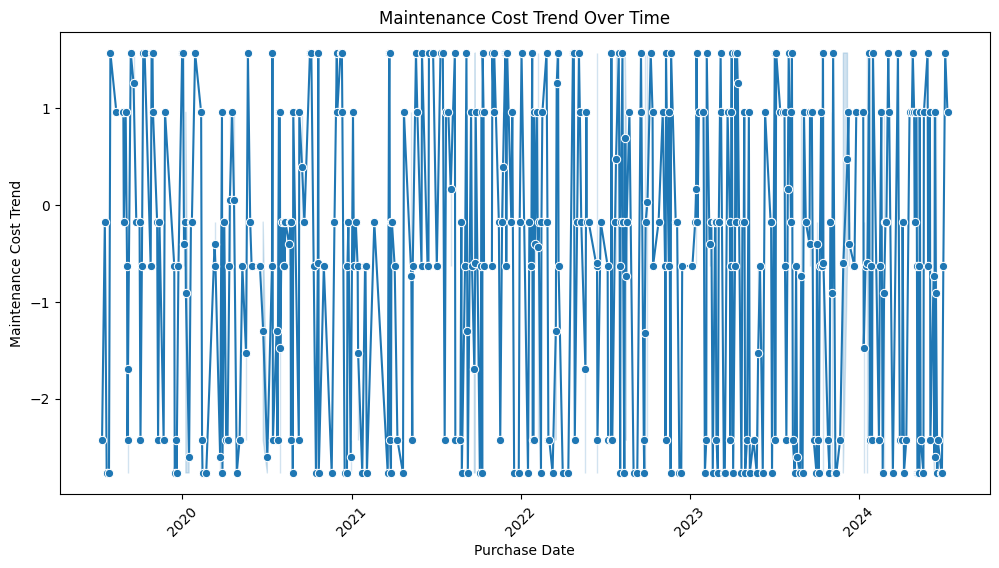

In [45]:
df_sampled = df.sample(n=500, random_state=42)  

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_sampled, x='Purchase Date', y='Maintenance Cost Trend', marker='o')

plt.title('Maintenance Cost Trend Over Time')
plt.xlabel('Purchase Date')
plt.ylabel('Maintenance Cost Trend')


plt.xticks(rotation=45)

plt.show()

In [48]:
df.head()

,Asset ID,Asset Type,Purchase Date,Lifecycle Status,Maintenance Cost,Replacement Cost,Age of Asset,Maintenance Cost Ratio,Avg Maintenance Cost,Maintenance Cost Trend
0,A1,Printer,2022-01-26,Retired,4791.18,7617.17,898,0.628997,2621.877786,-2.767218
1,A2,Laptop,2019-10-14,In Maintenance,2107.37,7292.71,1733,0.288969,2524.106139,-0.631447
2,A3,Printer,2024-02-13,Active,179.78,3695.11,150,0.048653,2621.877786,-2.767218
3,A4,Router,2019-10-03,Disposed,4988.30,7164.77,1744,0.696226,2561.675737,-2.428444
4,A5,Router,2021-01-21,Retired,1876.14,9876.08,1268,0.189968,2561.675737,-2.428444


In [50]:
X_acquisition = df[['Age of Asset', 'Maintenance Cost Ratio', 'Avg Maintenance Cost', 'Maintenance Cost Trend']]
y_acquisition = df['Replacement Cost'] 


X_train_acq, X_test_acq, y_train_acq, y_test_acq = train_test_split(X_acquisition, y_acquisition, test_size=0.2, random_state=42)
acquisition_model = RandomForestRegressor(n_estimators=100, random_state=42)

acquisition_model.fit(X_train_acq, y_train_acq)
y_pred_acq = acquisition_model.predict(X_test_acq)

from sklearn.metrics import mean_squared_error, r2_score

print(f'Acquisition Model Mean Squared Error: {mean_squared_error(y_test_acq, y_pred_acq):.2f}')
print(f'Acquisition Model R-squared: {r2_score(y_test_acq, y_pred_acq):.2f}')

Acquisition Model Mean Squared Error: 4343830.93
Acquisition Model R-squared: 0.41


In [52]:
joblib.dump(acquisition_model, 'acquisition_model.joblib')

['acquisition_model.joblib']

In [49]:
X_retirement = df[['Age of Asset', 'Maintenance Cost Ratio', 'Avg Maintenance Cost', 'Maintenance Cost Trend']]
y_retirement = df['Lifecycle Status'].apply(lambda x: 1 if x == 'Retired' or x == 'Disposed' else 0)


X_train_ret, X_test_ret, y_train_ret, y_test_ret = train_test_split(X_retirement, y_retirement, test_size=0.2, random_state=42)

retirement_model = RandomForestRegressor(n_estimators=100, random_state=42)
retirement_model.fit(X_train_ret, y_train_ret)
y_pred_ret = retirement_model.predict(X_test_ret)


print(f'Retirement Model Mean Squared Error: {mean_squared_error(y_test_ret, y_pred_ret):.2f}')
print(f'Retirement Model R-squared: {r2_score(y_test_ret, y_pred_ret):.2f}')

Retirement Model Mean Squared Error: 0.28
Retirement Model R-squared: -0.12


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib

X_classification = df[['Age of Asset', 'Maintenance Cost Ratio', 'Avg Maintenance Cost', 'Maintenance Cost Trend']]
y_classification = df['Lifecycle Status']

# Store original label names before encoding
label_names_original = y_classification.unique()

if y_classification.dtype == 'object':
    y_classification = y_classification.astype('category').cat.codes
    label_names_encoded = y_classification.astype('category').cat.categories
    
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

models = {
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'SVC': SVC(kernel='rbf', random_state=42)
}


results = {}

for model_name, model in models.items():
    model.fit(X_train_cls, y_train_cls)
    y_pred = model.predict(X_test_cls)
    
    accuracy = accuracy_score(y_test_cls, y_pred)
    precision = precision_score(y_test_cls, y_pred, average='weighted')
    recall = recall_score(y_test_cls, y_pred, average='weighted')
    f1 = f1_score(y_test_cls, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test_cls, y_pred)
    class_report = classification_report(y_test_cls, y_pred)
    
    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': conf_matrix,
        'classification_report': class_report
    }

# Print results for each model
for model_name, result in results.items():
    print(f"{model_name} Model:")
    print(f'Accuracy: {result["accuracy"]:.2f}')
    print(f'Precision: {result["precision"]:.2f}')
    print(f'Recall: {result["recall"]:.2f}')
    print(f'F1-score: {result["f1_score"]:.2f}')
    print(f'Confusion Matrix:\n{result["confusion_matrix"]}')
    print(f'Classification Report:\n{result["classification_report"]}\n')
    
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = models[best_model_name]

# Save the best model using joblib
joblib.dump(best_model, 'retirement_model.pkl')

print(f"Best model '{best_model_name}' saved successfully as 'retirement_model.pkl'.")

# Print the original and encoded label names
print("Original Label Names:")
print(label_names_original)
print("Encoded Label Names:")
print(label_names_encoded)


C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_

RandomForestClassifier Model:
Accuracy: 0.26
Precision: 0.26
Recall: 0.26
F1-score: 0.26
Confusion Matrix:
[[110 121 120 113]
 [132 158 118 122]
 [121 125 141 119]
 [126 128 128 118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.24      0.23       464
           1       0.30      0.30      0.30       530
           2       0.28      0.28      0.28       506
           3       0.25      0.24      0.24       500

    accuracy                           0.26      2000
   macro avg       0.26      0.26      0.26      2000
weighted avg       0.26      0.26      0.26      2000


LogisticRegression Model:
Accuracy: 0.26
Precision: 0.13
Recall: 0.26
F1-score: 0.17
Confusion Matrix:
[[  0 336 128   0]
 [  0 380 150   0]
 [  0 363 143   0]
 [  0 360 140   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       464
           1       0.26      0.72      0.39  

In [27]:
label_names 

Int64Index([0, 1, 2, 3], dtype='int64')

In [53]:
joblib.dump(retirement_model, 'retirement_model.joblib')

['retirement_model.joblib']

In [24]:
import pandas as pd
import joblib


retirement_model = joblib.load("../src/models/retirement_model.pkl")

sample_data = {
    'Age of Asset': 10,
    'Maintenance Cost Ratio': 0.2,
    'Avg Maintenance Cost': 2621.877786,
    'Maintenance Cost Trend': -2.767218
}


sample_df = pd.DataFrame([sample_data])

prediction = retirement_model.predict(sample_df)[0]

print(f"Predicted retirement time: {prediction}")

Predicted retirement time: 2


In [ ]:
1. Acquisition: Optimize Purchasing Decisions
Objective: Predict the best time to buy new assets based on the current asset's performance and maintenance trends.

Steps:
Feature Engineering: Create features that capture the trends and health of current assets.
Predictive Model: Use these features to train a model that predicts when an asset should be replaced.
Decision Rule: Develop rules that use the model's predictions to suggest when to acquire new assets.
2. Maintenance: Implement Predictive Maintenance Schedules
Objective: Predict when an asset is likely to need maintenance to minimize downtime and extend its lifespan.

Steps:
Feature Engineering: Extract features like age, maintenance cost ratio, and lifecycle status.
Predictive Model: Train a model to predict the maintenance cost or the likelihood of failure based on these features.
Scheduling: Use the model's predictions to schedule maintenance activities proactively.
3. Retirement: Plan Asset Retirement
Objective: Plan asset retirement in a way that maximizes residual value and minimizes environmental impact.

Steps:
Feature Engineering: Create features that indicate the end of an asset's useful life, such as age and cumulative maintenance cost.
Predictive Model: Train a model to predict the optimal retirement time based on these features.
Decision Rule: Use the model's predictions to plan the retirement and disposal of assets. 

In [63]:
df.head(10)

,Asset ID,Asset Type,Purchase Date,Lifecycle Status,Maintenance Cost,Replacement Cost,Age of Asset,Maintenance Cost Ratio
0,A1,Printer,2022-01-26,Retired,4791.18,7617.17,898,0.628997
1,A2,Laptop,2019-10-14,In Maintenance,2107.37,7292.71,1733,0.288969
2,A3,Printer,2024-02-13,Active,179.78,3695.11,150,0.048653
3,A4,Router,2019-10-03,Disposed,4988.30,7164.77,1744,0.696226
4,A5,Router,2021-01-21,Retired,1876.14,9876.08,1268,0.189968
5,A6,Server,2022-02-22,Active,949.83,1194.92,871,0.794890
6,A7,Printer,2023-09-19,Retired,2394.12,2845.80,297,0.841282
7,A8,Switch,2021-08-15,Active,290.28,9393.05,1062,0.030904
8,A9,Switch,2020-12-17,Active,1659.97,4794.31,1303,0.346238
9,A10,Laptop,2022-01-04,Disposed,2586.35,9798.85,920,0.263944


### Resource Optimization